Задача: обучить модели на датасете CIFAR100 c ограниченным числом параметров.
Необходимо провести исследование и построить кривую в осях количество параметров - качество.
Минимальный набор точек для исследования по числу параметров: 1000, 5000, 10000, 50000, 100000, 500000, 1000000.
Для сдачи задачи необходимо предоставить код обучения, чекпоинты моделей и визуализацию результатов.

# load CIFAR-100

up to 100 000 обязательно

исследования и эксперименты

поиграться с архитектурами

top1 accuracy

надо будет рассказать что дало баф и что пробовали

если просто каждую один раз обучить, то 15/25 баллов
если чуть чуть исследований то 20
доп баллы победителям категорий (маленькие круче)


In [ ]:
import torch
import numpy as np
torch.manual_seed(100)

from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Compose
import matplotlib.pyplot as plt

In [ ]:
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')


Using cuda device


In [ ]:
training_data = datasets.CIFAR100(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR100(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting data/cifar-100-python.tar.gz to data
Files already downloaded and verified


In [ ]:
classes = """0: apple
1: aquarium_fish
2: baby
3: bear
4: beaver
5: bed
6: bee
7: beetle
8: bicycle
9: bottle
10: bowl
11: boy
12: bridge
13: bus
14: butterfly
15: camel
16: can
17: castle
18: caterpillar
19: cattle
20: chair

21: chimpanzee

22: clock

23: cloud

24: cockroach

25: couch

26: cra

27: crocodile

28: cup

29: dinosaur

30: dolphin

31: elephant

32: flatfish

33: forest

34: fox

35: girl

36: hamster

37: house

38: kangaroo

39: keyboard

40: lamp

41: lawn_mower

42: leopard

43: lion

44: lizard

45: lobster

46: man

47: maple_tree

48: motorcycle

49: mountain

50: mouse

51: mushroom

52: oak_tree

53: orange

54: orchid

55: otter

56: palm_tree

57: pear

58: pickup_truck

59: pine_tree

60: plain

61: plate

62: poppy

63: porcupine

64: possum

65: rabbit

66: raccoon

67: ray

68: road

69: rocket

70: rose

71: sea

72: seal

73: shark

74: shrew

75: skunk

76: skyscraper

77: snail

78: snake

79: spider

80: squirrel

81: streetcar

82: sunflower

83: sweet_pepper

84: table

85: tank

86: telephone

87: television

88: tiger

89: tractor

90: train

91: trout

92: tulip
93: turtle
94: wardrobe
95: whale
96: willow_tree
97: wolf
98: woman
99: worm"""

In [ ]:
labels = classes.split()[1::2]

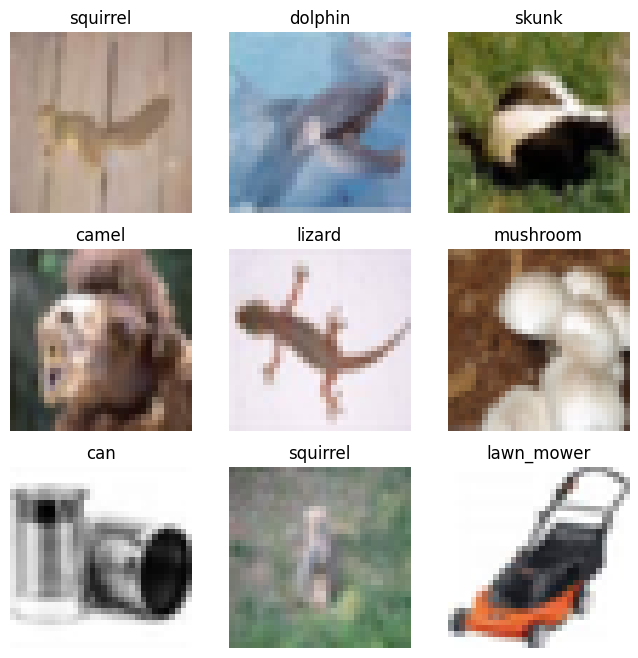

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() # Случайный индекс из датасета
    img, label = training_data[sample_idx] # Обращение по такому индексу возвращает изображение и метку элемента датасета
    figure.add_subplot(rows, cols, i)
    plt.title(labels[label])
    plt.axis("off")
    plt.imshow(np.moveaxis(img.numpy(),0,-1))
plt.show()

In [ ]:
img.numpy().shape

(3, 32, 32)

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [ ]:
#how many params:
def param_count(model):
  c = 0
  for param in model.parameters():
      laypar = 1
      for a in list(param.size()):
          laypar *= a
      #print(f"Size: {list(param.size())}, layer: {laypar}")
      c += laypar
  print(f'model has {c} parameters')

#param_count(model)

# first tries (model has 969512 parameters)



In [ ]:
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cpu device


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=7, kernel_size=(3, 3), stride=2, padding=(1, 1), bias=True),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(16*16*7, 512),
            nn.ReLU(),
            nn.Linear(512, 100),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Conv2d(3, 7, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Flatten(start_dim=1, end_dim=-1)
    (3): Linear(in_features=1792, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=100, bias=True)
  )
)


In [ ]:
X = torch.rand(1, 3, 32, 32, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred.numpy()[0]}, {labels[y_pred.numpy()[0]]}")

Predicted class: 22, clock


можно вызывать по слоям:

In [ ]:
"""
x0 = model.linear_relu_stack[0](X)
print(model.linear_relu_stack[0])
print(x0.size())
print(x0[0, 0, :4, :4])

x1 = model.linear_relu_stack[1](x0)
print(model.linear_relu_stack[1])
print(x1.size())
print(x1[0, 0, :4, :4])

...
"""

'\nx0 = model.linear_relu_stack[0](X)\nprint(model.linear_relu_stack[0])\nprint(x0.size())\nprint(x0[0, 0, :4, :4])\n\nx1 = model.linear_relu_stack[1](x0)\nprint(model.linear_relu_stack[1])\nprint(x1.size())\nprint(x1[0, 0, :4, :4])\n\n...\n'

In [ ]:
#мсотреть на параметры
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

теперь обучение

In [ ]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

 функцию обучения, которая будет проходить одну эпоху (т.е. один проход по всему датасету), получать предсказания модели для всех данных, вычислять лосс, градиенты лосса по параметрам модели и производить шаг алгоритма оптимизации.
Каждые 100 батчей мы будем печатать значение лосса и текущий прогресс.

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Получаем предсказания модели для данного батча
        pred = model(X)
        # Вычисляем лосс
        loss = loss_fn(pred, y)

        # Backpropagation
        # Обнуляем градиенты
        optimizer.zero_grad()
        # Вычисляем градиент лосса по параметрам модели
        loss.backward()
        # Производим шаг алгоритма оптимизации
        optimizer.step()

        if batch % 300 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
def test_loop(dataloader, model, loss_fn, accs):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    accs.append(100*correct)

In [ ]:
epochs = 60
accs = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    model.train(True)
    train_loop(train_dataloader, model, loss_fn, optimizer)
    model.train(False)
    test_loop(test_dataloader, model, loss_fn, accs)
print("Done!")

ОНО РАБОТАЕТ!!!!

In [ ]:
#дообучить
epochs2 = 20
accs2 = []
for t in range(epochs, epochs2):
    print(f"Epoch {t+1}\n-------------------------------")
    model.train(True)
    train_loop(train_dataloader, model, loss_fn, optimizer)
    model.train(False)
    test_loop(test_dataloader, model, loss_fn, accs2)
print("Done!")

In [ ]:
epochs += epochs2
accs += accs2

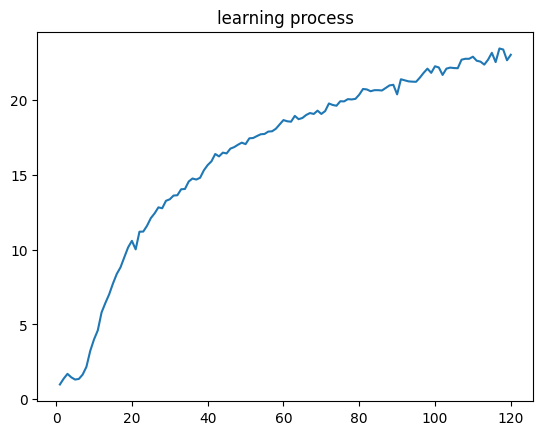

In [ ]:
#pict of learning
plt.plot(range(1,epochs+1), accs, label = 'epochs')
plt.title('learning process')
plt.show()

In [ ]:
#save
torch.save(model.state_dict(), "ft_model.pt")

In [ ]:
#load and check
new_model = NeuralNetwork().eval()
state_dict = torch.load("ft_model.pt")
new_model.load_state_dict(state_dict)

test_loop(test_dataloader, new_model, loss_fn)

# 1000 params

only conv

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=5, kernel_size=(5, 5), stride=2, padding=(3, 3), bias=True),
            nn.ReLU(),
            #17*17 pts *5 ch?
            nn.Conv2d(in_channels=5, out_channels=10, kernel_size=(3, 3), stride=2, padding=(2, 2), bias=True),
            nn.ReLU(),
            #10*10 pts *10 ch

            nn.Conv2d(in_channels=10, out_channels=1, kernel_size=(3, 3), stride=1, padding=(1, 1), bias=True),
            nn.Flatten()
        )


    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
            '''
            #4*4pts *10ch
            nn.Conv2d(in_channels=10, out_channels=100, kernel_size=(5, 5), stride=1, padding=(2, 2), bias=True),
            #4*4pts *100ch
            nn.MaxPool2d(kernel_size = (4, 4)),
            #1*1pts *100ch

                        nn.ReLU(),
            nn.Linear(100, 100)
            '''

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Conv2d(3, 5, kernel_size=(5, 5), stride=(2, 2), padding=(3, 3))
    (1): ReLU()
    (2): Conv2d(5, 10, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
    (3): ReLU()
    (4): Conv2d(10, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): Flatten(start_dim=1, end_dim=-1)
  )
)


In [ ]:
#if works with our data
X = torch.rand(1, 3, 32, 32, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
y = y_pred.cpu().numpy()[0]
print(f"Predicted class: {y}, {labels[y]}")

Predicted class: 60, plain


In [ ]:
param_count(model)

model has 931 parameters


learning

In [ ]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
#data to divice!!!

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        #move
        X = X.to(device)
        y = y.to(device)
        # Получаем предсказания модели для данного батча
        pred = model(X)
        # Вычисляем лосс
        loss = loss_fn(pred, y)

        # Backpropagation
        # Обнуляем градиенты
        optimizer.zero_grad()
        # Вычисляем градиент лосса по параметрам модели
        loss.backward()
        # Производим шаг алгоритма оптимизации
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn, accs):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            #move
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    accs.append(100*correct)

In [ ]:
epochs = 70
accs = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    model.train(True)
    train_loop(train_dataloader, model, loss_fn, optimizer)
    model.train(False)
    test_loop(test_dataloader, model, loss_fn, accs)
print("Done!")

Epoch 1
-------------------------------
loss: 4.603633  [    0/50000]
loss: 4.608882  [ 6400/50000]
loss: 4.605317  [12800/50000]
loss: 4.605449  [19200/50000]
loss: 4.606469  [25600/50000]
loss: 4.595207  [32000/50000]
loss: 4.604954  [38400/50000]
loss: 4.600624  [44800/50000]
Test Error: 
 Accuracy: 1.0%, Avg loss: 4.603803 

Epoch 2
-------------------------------
loss: 4.599101  [    0/50000]
loss: 4.606421  [ 6400/50000]
loss: 4.606816  [12800/50000]
loss: 4.615005  [19200/50000]
loss: 4.599380  [25600/50000]
loss: 4.603429  [32000/50000]
loss: 4.605793  [38400/50000]
loss: 4.606686  [44800/50000]
Test Error: 
 Accuracy: 0.9%, Avg loss: 4.603331 

Epoch 3
-------------------------------
loss: 4.604278  [    0/50000]
loss: 4.594765  [ 6400/50000]
loss: 4.599784  [12800/50000]
loss: 4.600186  [19200/50000]
loss: 4.603181  [25600/50000]
loss: 4.603052  [32000/50000]
loss: 4.606386  [38400/50000]
loss: 4.600995  [44800/50000]
Test Error: 
 Accuracy: 0.9%, Avg loss: 4.603346 

Epoch 4

In [ ]:
#after 70
#lr -> /=10
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-4
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
#дообучить
epochs2 = 60
for t in range(epochs, epochs+epochs2):
    print(f"Epoch {t+1}\n-------------------------------")
    model.train(True)
    train_loop(train_dataloader, model, loss_fn, optimizer)
    model.train(False)
    test_loop(test_dataloader, model, loss_fn, accs)
epochs += epochs2
print("Done!")

Epoch 71
-------------------------------
loss: 4.506716  [    0/50000]
loss: 4.568013  [ 6400/50000]
loss: 4.584151  [12800/50000]
loss: 4.501468  [19200/50000]
loss: 4.509481  [25600/50000]
loss: 4.446749  [32000/50000]
loss: 4.618830  [38400/50000]
loss: 4.539842  [44800/50000]
Test Error: 
 Accuracy: 2.6%, Avg loss: 4.536434 

Epoch 72
-------------------------------
loss: 4.536411  [    0/50000]
loss: 4.535377  [ 6400/50000]
loss: 4.584897  [12800/50000]
loss: 4.542681  [19200/50000]
loss: 4.542560  [25600/50000]
loss: 4.436532  [32000/50000]
loss: 4.580925  [38400/50000]
loss: 4.551334  [44800/50000]
Test Error: 
 Accuracy: 2.7%, Avg loss: 4.534714 

Epoch 73
-------------------------------
loss: 4.558312  [    0/50000]
loss: 4.387402  [ 6400/50000]
loss: 4.565263  [12800/50000]
loss: 4.568068  [19200/50000]
loss: 4.485735  [25600/50000]
loss: 4.517768  [32000/50000]
loss: 4.475169  [38400/50000]
loss: 4.532948  [44800/50000]
Test Error: 
 Accuracy: 2.7%, Avg loss: 4.537197 

Epoc

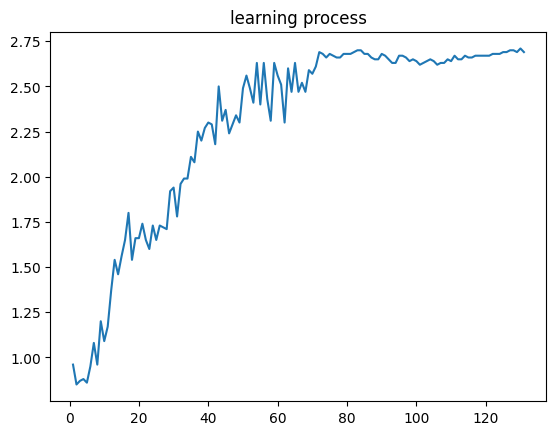

In [ ]:
#pict of learning
plt.plot(range(1,epochs+1), accs, label = 'epochs')
plt.title('learning process')
plt.show()

In [ ]:
#save
torch.save(model.state_dict(), "1000_model.pt")

In [ ]:
#load and check
new_model = NeuralNetwork().eval()
state_dict = torch.load("1000_model.pt")
new_model.load_state_dict(state_dict)

test_loop(test_dataloader, new_model, loss_fn)

# 5000 params

only conv

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(5, 5), stride=2, padding=(2, 2), bias=True),
            nn.ReLU(),
            #16*16 pts *5 ch?
            nn.Conv2d(in_channels=6, out_channels=10, kernel_size=(5, 5), stride=2, padding=(2, 2), bias=True),
            nn.ReLU(),
            #8*8 pts *5 ch
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(5, 5), stride=2, padding=(3, 3), bias=True),
            nn.ReLU(),
            #5*5pts *10ch
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(4, 1), stride=1, padding=(0, 0), bias=True), #пересобрать карты
            #2*5 pts*10ch
            nn.Flatten()
        )


    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
            '''
            #4*4pts *10ch
            nn.Conv2d(in_channels=10, out_channels=100, kernel_size=(5, 5), stride=1, padding=(2, 2), bias=True),
            #4*4pts *100ch
            nn.MaxPool2d(kernel_size = (4, 4)),
            #1*1pts *100ch

groups=10 ,

                        nn.ReLU(),
            nn.Linear(100, 100)
            '''

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): ReLU()
    (2): Conv2d(6, 10, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (3): ReLU()
    (4): Conv2d(10, 10, kernel_size=(5, 5), stride=(2, 2), padding=(3, 3))
    (5): ReLU()
    (6): Conv2d(10, 10, kernel_size=(4, 1), stride=(1, 1))
    (7): Flatten(start_dim=1, end_dim=-1)
  )
)


In [ ]:
#if works with our data
X = torch.rand(1, 3, 32, 32, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
y = y_pred.cpu().numpy()[0]
print(f"Predicted class: {y}, {labels[y]}")

Predicted class: 64, possum


In [ ]:
param_count(model)

model has 4886 parameters


learning

In [ ]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
#data to divice!!!

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        #move
        X = X.to(device)
        y = y.to(device)
        # Получаем предсказания модели для данного батча
        pred = model(X)
        # Вычисляем лосс
        loss = loss_fn(pred, y)

        # Backpropagation
        # Обнуляем градиенты
        optimizer.zero_grad()
        # Вычисляем градиент лосса по параметрам модели
        loss.backward()
        # Производим шаг алгоритма оптимизации
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn, accs):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            #move
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    accs.append(100*correct)

In [ ]:
epochs = 90
accs = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    model.train(True)
    train_loop(train_dataloader, model, loss_fn, optimizer)
    model.train(False)
    test_loop(test_dataloader, model, loss_fn, accs)
print("Done!")

Epoch 1
-------------------------------
loss: 4.609403  [    0/50000]
loss: 4.601701  [ 6400/50000]
loss: 4.598590  [12800/50000]
loss: 4.602607  [19200/50000]
loss: 4.601354  [25600/50000]
loss: 4.604659  [32000/50000]
loss: 4.602625  [38400/50000]
loss: 4.597568  [44800/50000]
Test Error: 
 Accuracy: 1.2%, Avg loss: 4.600859 

Epoch 2
-------------------------------
loss: 4.605006  [    0/50000]
loss: 4.594255  [ 6400/50000]
loss: 4.614923  [12800/50000]
loss: 4.589747  [19200/50000]
loss: 4.598109  [25600/50000]
loss: 4.595401  [32000/50000]
loss: 4.589614  [38400/50000]
loss: 4.618978  [44800/50000]
Test Error: 
 Accuracy: 1.4%, Avg loss: 4.595452 

Epoch 3
-------------------------------
loss: 4.581649  [    0/50000]
loss: 4.596201  [ 6400/50000]
loss: 4.582560  [12800/50000]
loss: 4.599127  [19200/50000]
loss: 4.582185  [25600/50000]
loss: 4.594954  [32000/50000]
loss: 4.587860  [38400/50000]
loss: 4.572298  [44800/50000]
Test Error: 
 Accuracy: 1.6%, Avg loss: 4.579757 

Epoch 4

In [ ]:
#after 90,130
#lr -> /=10
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-4
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
#дообучить
epochs2 = 20
for t in range(epochs, epochs+epochs2):
    print(f"Epoch {t+1}\n-------------------------------")
    model.train(True)
    train_loop(train_dataloader, model, loss_fn, optimizer)
    model.train(False)
    test_loop(test_dataloader, model, loss_fn, accs)
epochs += epochs2
print("Done!")

Epoch 131
-------------------------------
loss: 3.295563  [    0/50000]
loss: 3.823000  [ 6400/50000]
loss: 3.808048  [12800/50000]
loss: 3.527091  [19200/50000]
loss: 4.038276  [25600/50000]
loss: 3.604616  [32000/50000]
loss: 3.683399  [38400/50000]
loss: 3.880600  [44800/50000]
Test Error: 
 Accuracy: 14.1%, Avg loss: 3.775425 

Epoch 132
-------------------------------
loss: 3.625671  [    0/50000]
loss: 3.443245  [ 6400/50000]
loss: 3.976271  [12800/50000]
loss: 3.661219  [19200/50000]
loss: 3.912538  [25600/50000]
loss: 3.697243  [32000/50000]
loss: 3.660451  [38400/50000]
loss: 3.749860  [44800/50000]
Test Error: 
 Accuracy: 14.2%, Avg loss: 3.776975 

Epoch 133
-------------------------------
loss: 3.859025  [    0/50000]
loss: 3.403992  [ 6400/50000]
loss: 3.853993  [12800/50000]
loss: 3.334673  [19200/50000]
loss: 3.627909  [25600/50000]
loss: 3.521001  [32000/50000]
loss: 3.531222  [38400/50000]
loss: 3.542619  [44800/50000]
Test Error: 
 Accuracy: 14.1%, Avg loss: 3.775734 

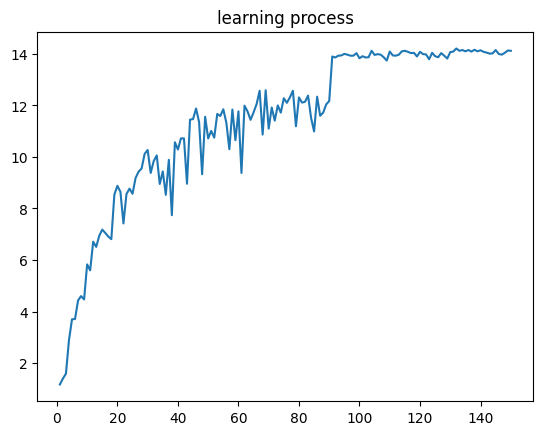

In [ ]:
#pict of learning
plt.plot(range(1,epochs+1), accs, label = 'epochs')
plt.title('learning process')
plt.show()

In [ ]:
#save
torch.save(model.state_dict(), "5000_model.pt")

In [ ]:
#load and check
new_model = NeuralNetwork().eval()
state_dict = torch.load("5000_model.pt")
new_model.load_state_dict(state_dict)

test_loop(test_dataloader, new_model, loss_fn)

# 10 000 params

mb not only conv

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(3, 3), stride=2, padding=(1, 1), bias=True),
            nn.ReLU(),
            #16*16 pts *5 ch
            nn.Conv2d(in_channels=6, out_channels=10, kernel_size=(3, 3), stride=2, padding=(1, 1), bias=True),
            nn.ReLU(),
            #8*8 pts *10 ch
            nn.MaxPool2d(kernel_size = (2, 2)),
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), stride=1, padding=(1, 1), bias=True),
            nn.ReLU(),
            #4*4 pts *10 ch
            nn.Conv2d(in_channels=10, out_channels=100, kernel_size=(4, 4), stride=1, padding=(0, 0), groups=2, bias=True),
            nn.Flatten(),
        )


    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
            '''
            #4*4pts *10ch
            nn.Conv2d(in_channels=10, out_channels=100, kernel_size=(5, 5), stride=1, padding=(2, 2), bias=True),
            #4*4pts *100ch
            nn.MaxPool2d(kernel_size = (4, 4)),
            #1*1pts *100ch
                        nn.Conv2d(in_channels=20, out_channels=100, kernel_size=(3, 3), stride=2, padding=(1, 1), bias=True),
            nn.ReLU(),
            #2*2 pts * 100ch
            nn.MaxPool2d(kernel_size = (2, 2)),

                        nn.ReLU(),
            nn.Linear(100, 100)
            '''

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(6, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(10, 100, kernel_size=(4, 4), stride=(1, 1), groups=2)
    (8): Flatten(start_dim=1, end_dim=-1)
  )
)


In [ ]:
#if works with our data
X = torch.rand(1, 3, 32, 32, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
y = y_pred.cpu().numpy()[0]
print(f"Predicted class: {y}, {labels[y]}")

Predicted class: 52, oak_tree


In [ ]:
param_count(model)

model has 9728 parameters


learning

In [ ]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
#data to divice!!!

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        #move
        X = X.to(device)
        y = y.to(device)
        # Получаем предсказания модели для данного батча
        pred = model(X)
        # Вычисляем лосс
        loss = loss_fn(pred, y)

        # Backpropagation
        # Обнуляем градиенты
        optimizer.zero_grad()
        # Вычисляем градиент лосса по параметрам модели
        loss.backward()
        # Производим шаг алгоритма оптимизации
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn, accs):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            #move
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    accs.append(100*correct)

In [ ]:
epochs = 90
accs = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    model.train(True)
    train_loop(train_dataloader, model, loss_fn, optimizer)
    model.train(False)
    test_loop(test_dataloader, model, loss_fn, accs)
print("Done!")

In [ ]:
#after 90
#lr -> /=10
loss_fn = nn.CrossEntropyLoss()
learning_rate /= 10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
#дообучить
epochs2 = 60
for t in range(epochs, epochs+epochs2):
    print(f"Epoch {t+1}\n-------------------------------")
    model.train(True)
    train_loop(train_dataloader, model, loss_fn, optimizer)
    model.train(False)
    test_loop(test_dataloader, model, loss_fn, accs)
epochs += epochs2
print("Done!")

Epoch 91
-------------------------------
loss: 3.179811  [    0/50000]
loss: 2.931585  [ 6400/50000]
loss: 3.176886  [12800/50000]
loss: 2.741089  [19200/50000]
loss: 3.419290  [25600/50000]
loss: 3.078689  [32000/50000]
loss: 3.054225  [38400/50000]
loss: 3.106134  [44800/50000]
Test Error: 
 Accuracy: 24.7%, Avg loss: 3.180522 

Epoch 92
-------------------------------
loss: 2.920319  [    0/50000]
loss: 2.846983  [ 6400/50000]
loss: 3.014731  [12800/50000]
loss: 2.810991  [19200/50000]
loss: 2.915496  [25600/50000]
loss: 2.907447  [32000/50000]
loss: 3.266556  [38400/50000]
loss: 3.134586  [44800/50000]
Test Error: 
 Accuracy: 24.7%, Avg loss: 3.182779 

Epoch 93
-------------------------------
loss: 3.047601  [    0/50000]
loss: 2.820084  [ 6400/50000]
loss: 3.190953  [12800/50000]
loss: 2.814479  [19200/50000]
loss: 3.163311  [25600/50000]
loss: 3.487697  [32000/50000]
loss: 2.840005  [38400/50000]
loss: 3.139435  [44800/50000]
Test Error: 
 Accuracy: 24.7%, Avg loss: 3.179859 

E

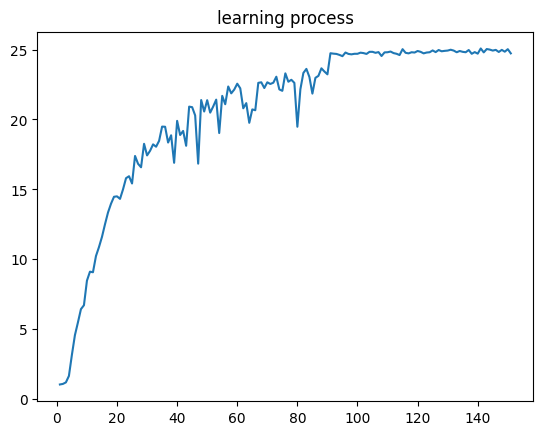

In [ ]:
#pict of learning
plt.plot(range(1,epochs+1), accs, label = 'epochs')
plt.title('learning process')
plt.show()

In [ ]:
#save
torch.save(model.state_dict(), "10000_model.pt")

In [ ]:
#load and check
new_model = NeuralNetwork().eval()
state_dict = torch.load("10000_model.pt")
new_model.load_state_dict(state_dict)

test_loop(test_dataloader, new_model, loss_fn)

# 50 000 params

коммунизжу скип коннекшены у человека с гитхаба
вообще там много чего, но есть желание применять именно скипы

https://vk.com/away.php?to=https%3A%2F%2Fgithub.com%2Fmagorokhoov%2Fyoutube_pytorch_lessons%2Fblob%2Fmain%2Flesson_5%2FDogs%2520and%2520cats.ipynb&el=snippet

с помощью Хайруллина Артура я их осознал и поприменял

In [ ]:
class ResBlock(nn.Module):
    def __init__(self, nc):
        super().__init__()

        self.conv0 = nn.Conv2d(nc, nc, kernel_size=3, groups=2, padding=1)#чтоб параметров меньше группы поставлю: карт много и мешаются в процессе
        self.norm0 = nn.BatchNorm2d(nc)
        self.act = nn.LeakyReLU(0.2)
        self.conv1 = nn.Conv2d(nc, nc, kernel_size=3, padding=1)
        self.norm1 = nn.BatchNorm2d(nc)

    def forward(self, x):
        out = self.conv0(x)
        out = self.norm0(out)
        out = self.act(out)
        out = self.conv1(out)
        out = self.norm1(out)
        return self.act(x + out)

In [ ]:
#ResBlock(сколько карт внутри перевариваются) у человека с гита там вообще 64,128,256

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        reslays=22
        self.linear_relu_stack = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(3, 3), stride=1, padding=(1, 1), groups=3, bias=True),
            nn.ReLU(),
            #32*32pts *6ch
            nn.Conv2d(in_channels=6, out_channels=reslays, kernel_size=(3, 3), stride=2, padding=(1, 1),bias=True),
            nn.ReLU(),
            #16*16 pts *reslays ch
            ResBlock(reslays),
            #16*16 pts *reslays ch
            nn.MaxPool2d(kernel_size = (2, 2)),
            #8*8 pts *reslays ch
            ResBlock(reslays),
            #8*8 pts *reslays ch
            nn.MaxPool2d(kernel_size = (2, 2)),
            #4*4 pts *reslays ch
            nn.Conv2d(in_channels=reslays, out_channels=100, kernel_size=(4, 4), stride=1, padding=(0, 0), bias=True),
            nn.Flatten(),
        )


    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
            '''
            #4*4pts *10ch
            nn.Conv2d(in_channels=10, out_channels=100, kernel_size=(5, 5), stride=1, padding=(2, 2), bias=True),
            #4*4pts *100ch
            nn.MaxPool2d(kernel_size = (4, 4)),
            #1*1pts *100ch

                        nn.ReLU(),
            nn.Linear(100, 100)
            '''

In [ ]:
model = NeuralNetwork().to(device)
#print(model)

In [ ]:
#if works with our data
X = torch.rand(1, 3, 32, 32, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
y = y_pred.cpu().numpy()[0]
print(f"Predicted class: {y}, {labels[y]}")

Predicted class: 83, sweet_pepper


In [ ]:
param_count(model)

model has 49902 parameters


learning

In [ ]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
#data to divice!!!

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        #move
        X = X.to(device)
        y = y.to(device)
        # Получаем предсказания модели для данного батча
        pred = model(X)
        # Вычисляем лосс
        loss = loss_fn(pred, y)

        # Backpropagation
        # Обнуляем градиенты
        optimizer.zero_grad()
        # Вычисляем градиент лосса по параметрам модели
        loss.backward()
        # Производим шаг алгоритма оптимизации
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn, accs):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            #move
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    accs.append(100*correct)

In [ ]:
epochs = 30
accs = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    model.train(True)
    train_loop(train_dataloader, model, loss_fn, optimizer)
    model.train(False)
    test_loop(test_dataloader, model, loss_fn, accs)
print("Done!")

In [ ]:
#epochs = t
epochs

16

In [ ]:
#after 13,15,16
#lr -> /=10
loss_fn = nn.CrossEntropyLoss()
learning_rate /= 10
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
#дообучить
epochs2 = 1
for t in range(epochs, epochs+epochs2):
    print(f"Epoch {t+1}\n-------------------------------")
    model.train(True)
    train_loop(train_dataloader, model, loss_fn, optimizer)
    model.train(False)
    test_loop(test_dataloader, model, loss_fn, accs)
epochs += epochs2
print("Done!")

Epoch 18
-------------------------------
loss: 1.442812  [    0/50000]
loss: 1.469384  [ 6400/50000]
loss: 1.675648  [12800/50000]
loss: 1.116831  [19200/50000]
loss: 1.664236  [25600/50000]
loss: 1.066751  [32000/50000]
loss: 1.663604  [38400/50000]
loss: 1.607847  [44800/50000]
Test Error: 
 Accuracy: 40.2%, Avg loss: 2.467953 

Done!


тут она уже училась переобученная и получалось что я дою пустую уже корову, но что поделать

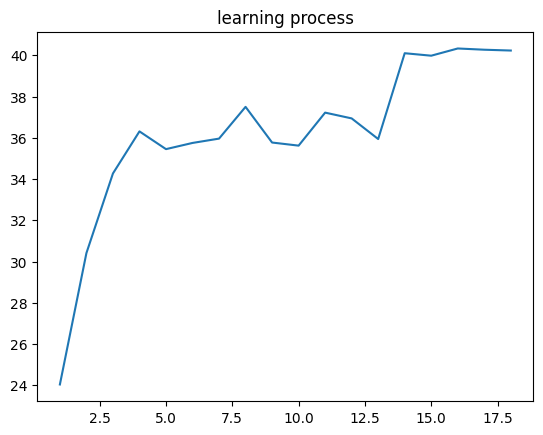

In [ ]:
#pict of learning
plt.plot(range(1,epochs+1), accs, label = 'epochs')
plt.title('learning process')
plt.show()

In [ ]:
#save
torch.save(model.state_dict(), "50000_model.pt")

In [ ]:
#load and check
new_model = NeuralNetwork().eval()
state_dict = torch.load("50000_model.pt")
new_model.load_state_dict(state_dict)

test_loop(test_dataloader, new_model, loss_fn)

# 100 000 params

коммунизжены скип коннекшены у человека с гитхаба
вообще там много чего, но есть желание применять именно скипы

https://vk.com/away.php?to=https%3A%2F%2Fgithub.com%2Fmagorokhoov%2Fyoutube_pytorch_lessons%2Fblob%2Fmain%2Flesson_5%2FDogs%2520and%2520cats.ipynb&el=snippet

с помощью Хайруллина Артура я их осознал и поприменял

In [ ]:
class ResBlock(nn.Module):
    def __init__(self, nc):
        super().__init__()

        self.conv0 = nn.Conv2d(nc, nc, kernel_size=3, padding=1)#чтоб параметров меньше группы поставлю: карт много и мешаются в процессе groups=2,
        self.norm0 = nn.BatchNorm2d(nc)
        self.act = nn.LeakyReLU(0.2)
        self.conv1 = nn.Conv2d(nc, nc, kernel_size=3, padding=1)
        self.norm1 = nn.BatchNorm2d(nc)

    def forward(self, x):
        out = self.conv0(x)
        out = self.norm0(out)
        out = self.act(out)
        out = self.conv1(out)
        out = self.norm1(out)
        return self.act(x + out)

In [ ]:
#ResBlock(сколько карт внутри перевариваются) у человека с гита там вообще 64,128,256

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        reslays=37
        self.linear_relu_stack = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=15, kernel_size=(3, 3), stride=1, padding=(1, 1), bias=True),#, groups=3
            nn.ReLU(),
            #32*32pts *6ch
            nn.Conv2d(in_channels=15, out_channels=reslays, kernel_size=(3, 3), stride=2, padding=(1, 1),bias=True),
            nn.ReLU(),
            #16*16 pts *reslays ch
            ResBlock(reslays),
            #16*16 pts *reslays ch
            nn.MaxPool2d(kernel_size = (2, 2)),
            #8*8 pts *reslays ch
            ResBlock(reslays),
            #8*8 pts *reslays ch
            nn.MaxPool2d(kernel_size = (2, 2)),
            #4*4 pts *reslays ch
            ResBlock(reslays),
            #4*4 pts *reslays ch
            nn.MaxPool2d(kernel_size = (2, 2)),
            #2*2 pts *reslays ch
            nn.Conv2d(in_channels=reslays, out_channels=100, kernel_size=(2, 2), stride=1, padding=(0, 0), bias=True),
            nn.Flatten(),
        )


    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
            '''
            #4*4pts *10ch
            nn.Conv2d(in_channels=10, out_channels=100, kernel_size=(5, 5), stride=1, padding=(2, 2), bias=True),
            #4*4pts *100ch
            nn.MaxPool2d(kernel_size = (4, 4)),
            #1*1pts *100ch

                        nn.ReLU(),
            nn.Linear(100, 100)
            '''

In [ ]:
model = NeuralNetwork().to(device)
#print(model)

In [ ]:
#if works with our data
X = torch.rand(1, 3, 32, 32, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
y = y_pred.cpu().numpy()[0]
print(f"Predicted class: {y}, {labels[y]}")

Predicted class: 62, poppy


In [ ]:
param_count(model)

model has 94944 parameters


learning

In [ ]:
#data to divice!!!

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        #move
        X = X.to(device)
        y = y.to(device)
        # Получаем предсказания модели для данного батча
        pred = model(X)
        # Вычисляем лосс
        loss = loss_fn(pred, y)

        # Backpropagation
        # Обнуляем градиенты
        optimizer.zero_grad()
        # Вычисляем градиент лосса по параметрам модели
        loss.backward()
        # Производим шаг алгоритма оптимизации
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn, accs):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            #move
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    accs.append(100*correct)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
epochs = 12
accs = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    model.train(True)
    train_loop(train_dataloader, model, loss_fn, optimizer)
    model.train(False)
    test_loop(test_dataloader, model, loss_fn, accs)
print("Done!")

Epoch 1
-------------------------------
loss: 6.140883  [    0/50000]
loss: 4.302579  [ 6400/50000]
loss: 3.985367  [12800/50000]
loss: 3.892910  [19200/50000]
loss: 3.950876  [25600/50000]
loss: 3.642554  [32000/50000]
loss: 3.375782  [38400/50000]
loss: 3.489641  [44800/50000]
Test Error: 
 Accuracy: 16.1%, Avg loss: 3.573026 

Epoch 2
-------------------------------
loss: 3.423011  [    0/50000]
loss: 3.333961  [ 6400/50000]
loss: 3.420622  [12800/50000]
loss: 3.394392  [19200/50000]
loss: 3.202459  [25600/50000]
loss: 2.958302  [32000/50000]
loss: 3.072698  [38400/50000]
loss: 3.075122  [44800/50000]
Test Error: 
 Accuracy: 24.1%, Avg loss: 3.079411 

Epoch 3
-------------------------------
loss: 2.804805  [    0/50000]
loss: 2.893848  [ 6400/50000]
loss: 2.923634  [12800/50000]
loss: 2.550311  [19200/50000]
loss: 2.868213  [25600/50000]
loss: 2.584863  [32000/50000]
loss: 3.195272  [38400/50000]
loss: 3.399608  [44800/50000]
Test Error: 
 Accuracy: 30.8%, Avg loss: 2.753915 

Epoc

In [ ]:
epochs = t
epochs

10

In [ ]:
learning_rate

0.01

In [ ]:
#after 12,16
#lr -> /=10
loss_fn = nn.CrossEntropyLoss()
learning_rate /= 10
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
#дообучить
epochs2 = 2
for t in range(epochs, epochs+epochs2):
    print(f"Epoch {t+1}\n-------------------------------")
    model.train(True)
    train_loop(train_dataloader, model, loss_fn, optimizer)
    model.train(False)
    test_loop(test_dataloader, model, loss_fn, accs)
epochs += epochs2
print("Done!")

Epoch 17
-------------------------------
loss: 1.388127  [    0/50000]
loss: 1.194184  [ 6400/50000]
loss: 1.088548  [12800/50000]
loss: 1.274177  [19200/50000]
loss: 1.266568  [25600/50000]
loss: 1.567146  [32000/50000]
loss: 1.399993  [38400/50000]
loss: 1.240806  [44800/50000]
Test Error: 
 Accuracy: 43.8%, Avg loss: 2.309734 

Epoch 18
-------------------------------
loss: 1.546503  [    0/50000]
loss: 1.383446  [ 6400/50000]
loss: 1.904770  [12800/50000]
loss: 1.310318  [19200/50000]
loss: 1.124957  [25600/50000]
loss: 1.284194  [32000/50000]
loss: 1.074392  [38400/50000]
loss: 1.545461  [44800/50000]
Test Error: 
 Accuracy: 43.8%, Avg loss: 2.324019 

Done!


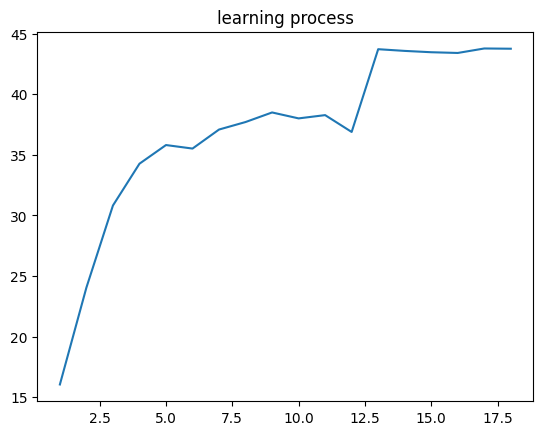

In [ ]:
#pict of learning
plt.plot(range(1,epochs+1), accs, label = 'epochs')
plt.title('learning process')
plt.show()

In [ ]:
#save
torch.save(model.state_dict(), "100000_model.pt")

In [ ]:
#load and check
new_model = NeuralNetwork().eval()
state_dict = torch.load("100000_model.pt")
new_model.load_state_dict(state_dict)

test_loop(test_dataloader, new_model, loss_fn)

# 500 000 params

коммунизжу скип коннекшены у человека с гитхаба
вообще там много чего, но есть желание применять именно скипы

https://vk.com/away.php?to=https%3A%2F%2Fgithub.com%2Fmagorokhoov%2Fyoutube_pytorch_lessons%2Fblob%2Fmain%2Flesson_5%2FDogs%2520and%2520cats.ipynb&el=snippet

с помощью Хайруллина Артура я их осознал и поприменял

хочу не прост скипы маленькие, а пару блоков, где внутри нескоько скипов и они через разное расстояние

In [ ]:
a = torch.tensor([[1,2],[5,6]])
b = torch.tensor([[3,4]])
torch.concatenate((a,b), axis = 0)

tensor([[1, 2],
        [5, 6],
        [3, 4]])

In [ ]:
class ArcSkip(nn.Module):
    def __init__(self, nc):
        super().__init__()

        self.conv0 = nn.Conv2d(nc, nc, kernel_size=5, groups=2, padding=2)#чтоб параметров меньше группы поставлю: карт много и мешаются в процессе groups=2,
        self.conv1 = nn.Conv2d(nc, nc, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(nc, nc, kernel_size=3, groups=3, padding=1)
        self.conv3 = nn.Conv2d(nc, nc, kernel_size=5, padding=2)
        self.norm0 = nn.BatchNorm2d(nc)
        self.norm1 = nn.BatchNorm2d(nc)
        self.norm2 = nn.BatchNorm2d(nc)
        self.norm3 = nn.BatchNorm2d(nc)
        self.act = nn.LeakyReLU(0.2)


    def forward(self, x):
        out = self.conv0(x)
        out = self.norm0(out)
        sk1 = self.act(out)

        out = self.conv1(sk1)
        out = self.norm1(out)
        sk2 = self.act(out)

        out = self.conv2(out)
        out = self.norm2(out)
        out = self.act(out)

        out = self.conv3(sk1+out)
        out = self.norm3(out)
        return self.act(x + out)

In [ ]:
class ResBlock(nn.Module):
    def __init__(self, nc):
        super().__init__()

        self.conv0 = nn.Conv2d(nc, nc, kernel_size=3, padding=1)#чтоб параметров меньше группы поставлю: карт много и мешаются в процессе groups=2,
        self.norm0 = nn.BatchNorm2d(nc)
        self.act = nn.LeakyReLU(0.2)
        self.conv1 = nn.Conv2d(nc, nc, kernel_size=3, padding=1)
        self.norm1 = nn.BatchNorm2d(nc)

    def forward(self, x):
        out = self.conv0(x)
        out = self.norm0(out)
        out = self.act(out)
        out = self.conv1(out)
        out = self.norm1(out)
        return self.act(x + out)

In [ ]:
#ResBlock(сколько карт внутри перевариваются) у человека с гита там вообще 64,128,256

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        reslays=54
        self.linear_relu_stack = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=18, kernel_size=(3, 3), stride=1, padding=(1, 1), bias=True),
            nn.ReLU(),
            #32*32pts *18ch
            ResBlock(18),
            nn.Conv2d(in_channels=18, out_channels=reslays, kernel_size=(3, 3), stride=2, padding=(1, 1), bias=True),
            nn.ReLU(),
            #16*16 pts *reslays ch
            ArcSkip(reslays),
            ResBlock(reslays),
            nn.MaxPool2d(kernel_size = (2, 2)),
            #8*8 pts *reslays c
            ArcSkip(reslays),
            ResBlock(reslays),
            nn.MaxPool2d(kernel_size = (2, 2)),
            #4*4 pts *reslays ch
            ResBlock(reslays),
            nn.Conv2d(in_channels=reslays, out_channels=10, kernel_size=(3, 3), stride=1, padding=(1, 1), bias=True),
            nn.Flatten(),
            nn.ReLU(),
            nn.Linear(10*4*4, 100)
        )


    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
            '''
            #4*4pts *10ch
            nn.Conv2d(in_channels=10, out_channels=100, kernel_size=(5, 5), stride=1, padding=(2, 2), bias=True),
            #4*4pts *100ch
            nn.MaxPool2d(kernel_size = (4, 4)),
            #1*1pts *100ch

                        nn.ReLU(),
            nn.Linear(100, 100)
            '''

In [ ]:
model = NeuralNetwork().to(device)
#print(model)

In [ ]:
#if works with our data
X = torch.rand(1, 3, 32, 32, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
y = y_pred.cpu().numpy()[0]
print(f"Predicted class: {y}, {labels[y]}")

Predicted class: 65, rabbit


In [ ]:
param_count(model)

model has 484632 parameters


learning

In [ ]:
#data to divice!!!

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        #move
        X = X.to(device)
        y = y.to(device)
        # Получаем предсказания модели для данного батча
        pred = model(X)
        # Вычисляем лосс
        loss = loss_fn(pred, y)

        # Backpropagation
        # Обнуляем градиенты
        optimizer.zero_grad()
        # Вычисляем градиент лосса по параметрам модели
        loss.backward()
        # Производим шаг алгоритма оптимизации
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn, accs):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            #move
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    accs.append(100*correct)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
epochs = 15
accs = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    model.train(True)
    train_loop(train_dataloader, model, loss_fn, optimizer)
    model.train(False)
    test_loop(test_dataloader, model, loss_fn, accs)
print("Done!")

Epoch 1
-------------------------------
loss: 5.010194  [    0/50000]
loss: 4.294322  [ 6400/50000]
loss: 4.050813  [12800/50000]
loss: 3.801148  [19200/50000]
loss: 3.850161  [25600/50000]
loss: 3.627851  [32000/50000]
loss: 3.576733  [38400/50000]
loss: 3.344940  [44800/50000]
Test Error: 
 Accuracy: 16.3%, Avg loss: 3.507815 

Epoch 2
-------------------------------
loss: 3.119590  [    0/50000]
loss: 3.250011  [ 6400/50000]
loss: 3.660242  [12800/50000]
loss: 3.192290  [19200/50000]
loss: 2.909094  [25600/50000]
loss: 3.104380  [32000/50000]
loss: 3.212743  [38400/50000]
loss: 2.937707  [44800/50000]
Test Error: 
 Accuracy: 26.2%, Avg loss: 2.989351 

Epoch 3
-------------------------------
loss: 2.662044  [    0/50000]
loss: 2.981611  [ 6400/50000]
loss: 2.753057  [12800/50000]
loss: 2.868921  [19200/50000]
loss: 2.775749  [25600/50000]
loss: 2.631439  [32000/50000]
loss: 2.789227  [38400/50000]
loss: 2.573881  [44800/50000]
Test Error: 
 Accuracy: 32.2%, Avg loss: 2.671807 

Epoc

In [ ]:
#epochs = t
epochs

In [ ]:
#after 15,18
#lr -> /=10
loss_fn = nn.CrossEntropyLoss()
learning_rate /= 10
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
#дообучить
epochs2 = 2
for t in range(epochs, epochs+epochs2):
    print(f"Epoch {t+1}\n-------------------------------")
    model.train(True)
    train_loop(train_dataloader, model, loss_fn, optimizer)
    model.train(False)
    test_loop(test_dataloader, model, loss_fn, accs)
epochs += epochs2
print("Done!")

Epoch 19
-------------------------------
loss: 0.614927  [    0/50000]
loss: 0.407553  [ 6400/50000]
loss: 0.447683  [12800/50000]
loss: 0.365204  [19200/50000]
loss: 0.384228  [25600/50000]
loss: 0.463079  [32000/50000]
loss: 0.374579  [38400/50000]
loss: 0.339649  [44800/50000]
Test Error: 
 Accuracy: 48.5%, Avg loss: 2.405365 

Epoch 20
-------------------------------
loss: 0.320083  [    0/50000]
loss: 0.340943  [ 6400/50000]
loss: 0.484885  [12800/50000]
loss: 0.566577  [19200/50000]
loss: 0.352530  [25600/50000]
loss: 0.308643  [32000/50000]
loss: 0.152103  [38400/50000]
loss: 0.332643  [44800/50000]
Test Error: 
 Accuracy: 48.6%, Avg loss: 2.413818 

Done!


тут она уже училась переобученная и получалось что я дою пустую уже корову, но что поделать

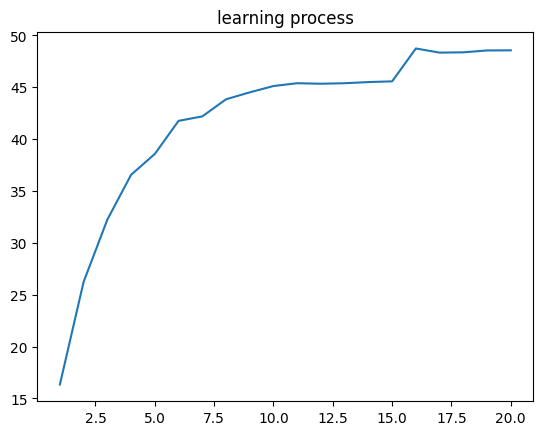

In [ ]:
#pict of learning
plt.plot(range(1,epochs+1), accs, label = 'epochs')
plt.title('learning process')
plt.show()

In [ ]:
#save
torch.save(model.state_dict(), "500000_model.pt")

In [ ]:
#load and check
new_model = NeuralNetwork().eval()
state_dict = torch.load("500000_model.pt")
new_model.load_state_dict(state_dict)

test_loop(test_dataloader, new_model, loss_fn)

# очень много 2

хочу не прост скипы маленькие, а пару блоков, где внутри нескоько скипов и они через разное расстояние

In [ ]:
class ArcSkip(nn.Module):
    def __init__(self, nc):
        super().__init__()

        self.conv0 = nn.Conv2d(nc, nc, kernel_size=5, groups=2, padding=2)#чтоб параметров меньше группы поставлю: карт много и мешаются в процессе groups=2,
        self.conv1 = nn.Conv2d(nc, nc, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(nc, nc, kernel_size=3, groups=3, padding=1)
        self.conv3 = nn.Conv2d(nc, nc, kernel_size=5, padding=2)
        self.conv4 = nn.Conv2d(nc, nc, kernel_size=3, groups=2, padding=1)
        self.norm0 = nn.BatchNorm2d(nc)
        self.norm1 = nn.BatchNorm2d(nc)
        self.norm2 = nn.BatchNorm2d(nc)
        self.norm3 = nn.BatchNorm2d(nc)
        self.norm4 = nn.BatchNorm2d(nc)
        self.act = nn.LeakyReLU(0.2)


    def forward(self, x):
        out = self.conv0(x)
        out = self.norm0(out)
        sk1 = self.act(out)

        out = self.conv1(sk1)
        out = self.norm1(out)
        sk2 = self.act(out)

        out = self.conv2(out+sk2)
        out = self.norm2(out)
        out = self.act(out)

        out = self.conv3(sk1+out)
        out = self.norm3(out)
        out = self.act(out)

        out = self.conv4(out)
        out = self.norm4(out)
        return self.act(x + out)

In [ ]:
class ResBlock(nn.Module):
    def __init__(self, nc):
        super().__init__()

        self.conv0 = nn.Conv2d(nc, nc, kernel_size=3, groups=2, padding=1)#чтоб параметров меньше группы поставлю: карт много и мешаются в процессе groups=2,
        self.norm0 = nn.BatchNorm2d(nc)
        self.act = nn.LeakyReLU(0.2)
        self.conv1 = nn.Conv2d(nc, nc, kernel_size=3, padding=1)
        self.norm1 = nn.BatchNorm2d(nc)

    def forward(self, x):
        out = self.conv0(x)
        out = self.norm0(out)
        out = self.act(out)
        out = self.conv1(out)
        out = self.norm1(out)
        return self.act(x + out)

In [ ]:
#ResBlock(сколько карт внутри перевариваются) у человека с гита там вообще 64,128,256

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        reslays=66
        self.linear_relu_stack = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=24, kernel_size=(3, 3), stride=1, padding=(1, 1), bias=True),
            nn.ReLU(),
            #32*32pts *24ch
            ArcSkip(24),
            nn.Conv2d(in_channels=24, out_channels=reslays, kernel_size=(3, 3), stride=2, padding=(1, 1), bias=True),
            nn.ReLU(),
            #16*16 pts *reslays ch
            ArcSkip(reslays),
            ResBlock(reslays),
            ArcSkip(reslays),
            nn.MaxPool2d(kernel_size = (2, 2)),
            #8*8 pts *reslays c
            ArcSkip(reslays),
            ResBlock(reslays),
            nn.MaxPool2d(kernel_size = (2, 2)),
            #4*4 pts *reslays ch
            ResBlock(reslays),
            nn.Conv2d(in_channels=reslays, out_channels=10, kernel_size=(3, 3), stride=1, padding=(1, 1), bias=True),
            nn.Flatten(),
            nn.ReLU(),
            nn.Linear(10*4*4, 100)
        )


    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
            '''
            #4*4pts *10ch
            nn.Conv2d(in_channels=10, out_channels=100, kernel_size=(5, 5), stride=1, padding=(2, 2), bias=True),
            #4*4pts *100ch
            nn.MaxPool2d(kernel_size = (4, 4)),
            #1*1pts *100ch

                        nn.ReLU(),
            nn.Linear(100, 100)
            '''

In [ ]:
model = NeuralNetwork().to(device)
#print(model)

In [ ]:
#if works with our data
X = torch.rand(1, 3, 32, 32, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
y = y_pred.cpu().numpy()[0]
print(f"Predicted class: {y}, {labels[y]}")

Predicted class: 45, lobster


In [ ]:
param_count(model)

model has 954756 parameters


learning

In [ ]:
#data to divice!!!

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        #move
        X = X.to(device)
        y = y.to(device)
        # Получаем предсказания модели для данного батча
        pred = model(X)
        # Вычисляем лосс
        loss = loss_fn(pred, y)

        # Backpropagation
        # Обнуляем градиенты
        optimizer.zero_grad()
        # Вычисляем градиент лосса по параметрам модели
        loss.backward()
        # Производим шаг алгоритма оптимизации
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn, accs):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            #move
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    accs.append(100*correct)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
epochs = 15
accs = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    model.train(True)
    train_loop(train_dataloader, model, loss_fn, optimizer)
    model.train(False)
    test_loop(test_dataloader, model, loss_fn, accs)
print("Done!")

Epoch 1
-------------------------------
loss: 4.727832  [    0/50000]
loss: 4.276798  [ 6400/50000]
loss: 3.999028  [12800/50000]
loss: 3.879127  [19200/50000]
loss: 3.932946  [25600/50000]
loss: 3.942364  [32000/50000]
loss: 3.508456  [38400/50000]
loss: 3.734130  [44800/50000]
Test Error: 
 Accuracy: 15.0%, Avg loss: 3.614084 

Epoch 2
-------------------------------
loss: 3.667641  [    0/50000]
loss: 3.603685  [ 6400/50000]
loss: 3.543130  [12800/50000]
loss: 3.405869  [19200/50000]
loss: 3.268268  [25600/50000]
loss: 2.762596  [32000/50000]
loss: 3.156143  [38400/50000]
loss: 3.219630  [44800/50000]
Test Error: 
 Accuracy: 23.2%, Avg loss: 3.145690 

Epoch 3
-------------------------------
loss: 3.139060  [    0/50000]
loss: 3.081894  [ 6400/50000]
loss: 3.073104  [12800/50000]
loss: 2.785092  [19200/50000]
loss: 3.039123  [25600/50000]
loss: 2.816586  [32000/50000]
loss: 2.779848  [38400/50000]
loss: 2.336366  [44800/50000]
Test Error: 
 Accuracy: 28.8%, Avg loss: 2.845357 

Epoc

In [ ]:
#epochs = t
epochs

15

In [ ]:
#after 15,19,21
#lr -> /=10
loss_fn = nn.CrossEntropyLoss()
learning_rate /= 10
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
#дообучить
epochs2 = 1
for t in range(epochs, epochs+epochs2):
    print(f"Epoch {t+1}\n-------------------------------")
    model.train(True)
    train_loop(train_dataloader, model, loss_fn, optimizer)
    model.train(False)
    test_loop(test_dataloader, model, loss_fn, accs)
epochs += epochs2
print("Done!")

Epoch 22
-------------------------------
loss: 0.297121  [    0/50000]
loss: 0.405930  [ 6400/50000]
loss: 0.545312  [12800/50000]
loss: 0.426490  [19200/50000]
loss: 0.415025  [25600/50000]
loss: 0.356868  [32000/50000]
loss: 0.388518  [38400/50000]
loss: 0.609532  [44800/50000]
Test Error: 
 Accuracy: 47.9%, Avg loss: 2.411546 

Done!


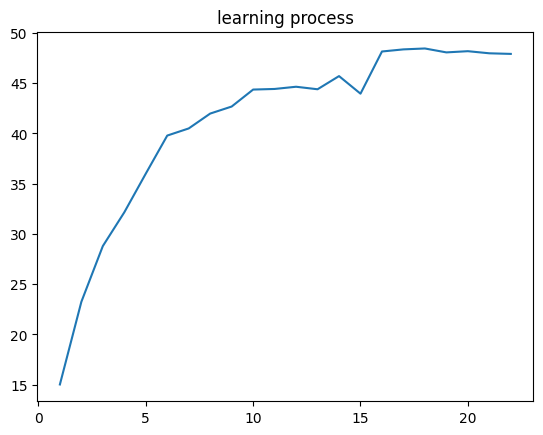

In [ ]:
#pict of learning
plt.plot(range(1,epochs+1), accs, label = 'epochs')
plt.title('learning process')
plt.show()

In [ ]:
#save
torch.save(model.state_dict(), "1000000_model.pt")

In [ ]:
#load and check
new_model = NeuralNetwork().eval()
state_dict = torch.load("1000000_model.pt")
new_model.load_state_dict(state_dict)

test_loop(test_dataloader, new_model, loss_fn)

# Concl


In [ ]:
params = [1000, 5000, 10000, 50000, 100000, 500000, 1000000]
scores = [0.027,0.141, 0.25, 0.402, 0.438,   0.486   , 0.48]

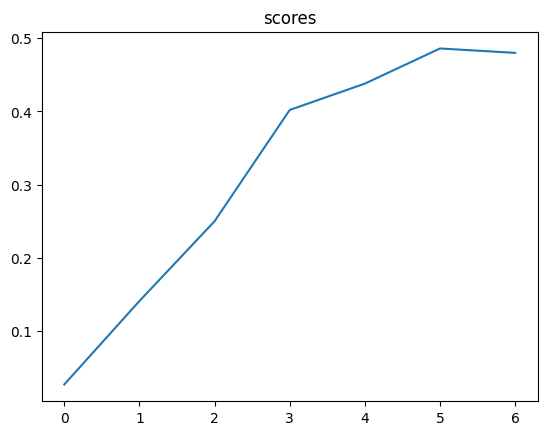

In [ ]:
#pict of scores
plt.plot(range(7), scores)
plt.title('scores')
plt.show()